In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app= application_df.drop(['EIN','NAME', 'SPECIAL_CONSIDERATIONS'], axis=1)
app.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace=['T9','T13','T12','T2','T25','T14','T29','T15','T17']

# Replace in dataframe
for ap in application_types_to_replace:
    app['APPLICATION_TYPE'] = app['APPLICATION_TYPE'].replace(ap,'Other')

# Check to make sure binning was successful
app['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
ctr=app['CLASSIFICATION'].unique()
classifications_to_replace=ctr.tolist()
classifications_to_replace.remove('C1000')
classifications_to_replace.remove('C2000')
classifications_to_replace.remove('C3000')
classifications_to_replace.remove('C1200')
classifications_to_replace.remove('C2100')


# Replace in dataframe
for cls in classifications_to_replace:
    app['CLASSIFICATION'] = app['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
app['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

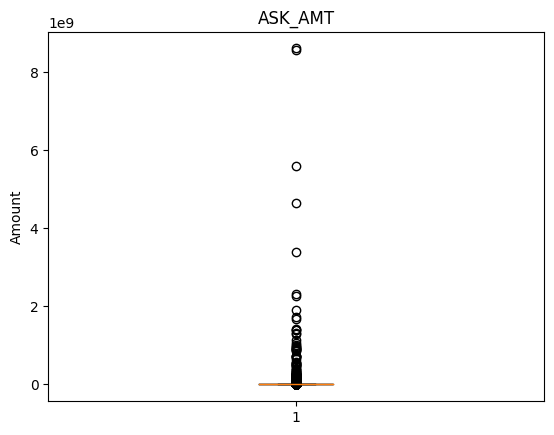

In [ ]:
#finding outliers

import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_title('ASK_AMT')
ax1.set_ylabel('Amount')
ax1.boxplot(app['ASK_AMT'])
plt.show()

In [ ]:
app['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [ ]:
appp=app.loc[(app['ASK_AMT'] <=8500000000),:]

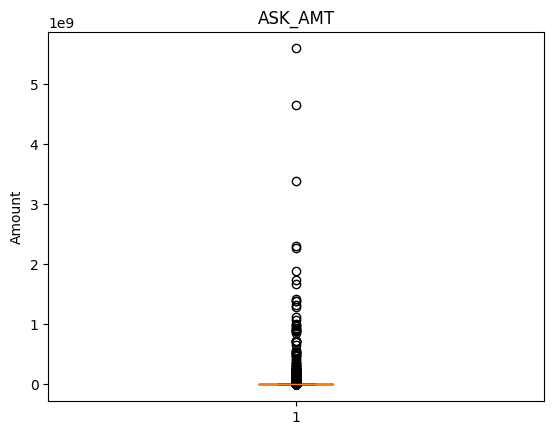

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_title('ASK_AMT')
ax1.set_ylabel('Amount')
ax1.boxplot(appp['ASK_AMT'])
plt.show()

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dumm=pd.get_dummies(appp)

app_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34297 entries, 0 to 34298
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34297 non-null  int64
 1   ASK_AMT                       34297 non-null  int64
 2   IS_SUCCESSFUL                 34297 non-null  int64
 3   APPLICATION_TYPE_Other        34297 non-null  uint8
 4   APPLICATION_TYPE_T10          34297 non-null  uint8
 5   APPLICATION_TYPE_T19          34297 non-null  uint8
 6   APPLICATION_TYPE_T3           34297 non-null  uint8
 7   APPLICATION_TYPE_T4           34297 non-null  uint8
 8   APPLICATION_TYPE_T5           34297 non-null  uint8
 9   APPLICATION_TYPE_T6           34297 non-null  uint8
 10  APPLICATION_TYPE_T7           34297 non-null  uint8
 11  APPLICATION_TYPE_T8           34297 non-null  uint8
 12  AFFILIATION_CompanySponsored  34297 non-null  uint8
 13  AFFILIATION_Family/Parent     3

In [ ]:
# Split our preprocessed data into our features and target arrays
X = app_dumm.copy()
X.drop("IS_SUCCESSFUL", axis=1, inplace=True)
# Define target vector
y = app_dumm["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  64
hidden_nodes_layer2 = 64

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5303 - accuracy: 0.7412
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5301 - accuracy: 0.7412
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7418
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5299 - accuracy: 0.7418
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5299 - accuracy: 0.7416
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7425
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7413
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7415
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.7419
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5296 - accura

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5672 - accuracy: 0.7320 - 467ms/epoch - 2ms/step
Loss: 0.5672419667243958, Accuracy: 0.7320116758346558


In [22]:
# Export our model to HDF5 file
from google.colab import files
nn.save('../Colab Notebooks/AlphabetSoupCharity_Optimization.h5')
files.download('../Colab Notebooks/AlphabetSoupCharity_Optimization.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>